In [2]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

ModuleNotFoundError: No module named 'statsmodels'

## Read the data

In [3]:
raw_er_admission = pd.read_excel('../data/raw/er_admission.xlsx', sheet_name = 'Data')

## Exploratory analysis

In [21]:
raw_er_admission.head()

,Site,DayWeek_coded,Shift_coded,Arr_Amb,Gender,Age_band,IMD_quintile,Ethnicity,ACSC,Consultant_on_duty,ED bed occupancy,Inpatient_bed_occupancy,Arrival intensity,LAS intensity,LWBS intensity,Stay_length,Last_10_mins,Admission_ALL
0,1.0,1.0,1.0,0.0,1.0,2.0,4.0,1.0,0.0,1.0,1.078947,0.97783,21.0,0.095238,0.058824,78.0,0.0,1.0
1,1.0,1.0,1.0,0.0,0.0,0.0,4.0,4.0,0.0,1.0,1.736842,0.97783,24.0,0.041667,0.000000,202.0,0.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,1.842105,0.97783,28.0,0.250000,0.083333,234.0,1.0,1.0
3,1.0,1.0,1.0,0.0,0.0,0.0,3.0,1.0,0.0,1.0,1.842105,0.97783,28.0,0.250000,0.083333,239.0,1.0,1.0
4,1.0,1.0,1.0,0.0,0.0,1.0,5.0,6.0,0.0,1.0,1.763158,0.97783,36.0,0.138889,0.000000,227.0,0.0,1.0


In [10]:
raw_er_admission.describe()

,Site,DayWeek_coded,Shift_coded,Arr_Amb,Gender,Age_band,IMD_quintile,Ethnicity,ACSC,Consultant_on_duty,ED bed occupancy,Inpatient_bed_occupancy,Arrival intensity,LAS intensity,LWBS intensity,Stay_length,Last_10_mins,Admission_ALL
count,19734.000000,19734.000000,19734.000000,19734.000000,19734.000000,19734.000000,19734.000000,19721.000000,18850.000000,19734.000000,19734.000000,19734.000000,19734.000000,19734.000000,19734.000000,19713.000000,19726.000000,19736.000000
mean,1.809770,3.888011,0.660383,0.354312,0.491791,0.812304,2.823705,3.890827,0.104934,0.850664,1.254549,0.944743,12.486470,0.354312,0.030692,167.498351,0.159282,0.634694
std,0.827181,2.104820,0.473591,0.478317,0.499945,0.861832,1.542809,2.183563,0.306476,0.356429,0.484500,0.038698,6.326245,0.192843,0.067857,101.687163,0.365948,44.581482
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.078947,0.821510,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.894737,0.920000,8.000000,0.222222,0.000000,96.000000,0.000000,0.000000
50%,2.000000,4.000000,1.000000,0.000000,0.000000,1.000000,3.000000,4.000000,0.000000,1.000000,1.236842,0.954492,11.000000,0.333333,0.000000,172.000000,0.000000,0.000000
75%,3.000000,6.000000,1.000000,1.000000,1.000000,1.000000,4.000000,6.000000,0.000000,1.000000,1.578947,0.969662,16.000000,0.461538,0.000000,228.000000,0.000000,1.000000
max,3.000000,7.000000,1.000000,1.000000,1.000000,3.000000,5.000000,6.000000,1.000000,1.000000,2.695652,1.000000,36.000000,1.000000,1.000000,1516.000000,1.000000,6263.000000


In [22]:
correlations = raw_er_admission.corr()

<AxesSubplot:>

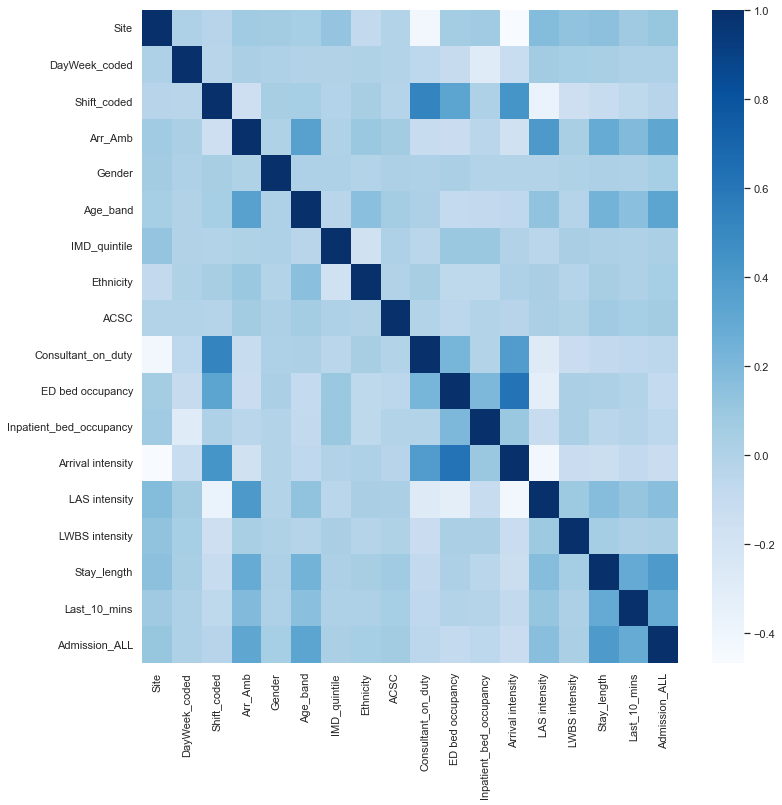

In [18]:
sns.set(rc={'figure.figsize':(12, 12)})
sns.heatmap(correlations, cmap = "Blues")

## Pre-processing

In [33]:
er_admission = raw_er_admission.dropna()

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(er_admission.drop(['Admission_ALL', 'Stay_length'], axis = 1), 
                                                    er_admission["Stay_length"], test_size=0.2, random_state=1337)

In [38]:
X_train

,Site,DayWeek_coded,Shift_coded,Arr_Amb,Gender,Age_band,IMD_quintile,Ethnicity,ACSC,Consultant_on_duty,ED bed occupancy,Inpatient_bed_occupancy,Arrival intensity,LAS intensity,LWBS intensity,Last_10_mins
1802,2.0,1.0,1.0,0.0,0.0,1.0,3.0,6.0,0.0,1.0,0.756757,0.913043,10.0,0.300000,0.000000,0.0
10759,2.0,4.0,1.0,0.0,1.0,0.0,2.0,6.0,1.0,1.0,1.324324,0.920000,12.0,0.166667,0.125000,0.0
12763,2.0,5.0,1.0,0.0,1.0,1.0,1.0,2.0,0.0,1.0,0.891892,0.855835,7.0,0.428571,0.166667,0.0
8271,2.0,3.0,0.0,0.0,0.0,0.0,3.0,6.0,0.0,0.0,0.702703,0.920000,8.0,0.125000,0.166667,1.0
17326,1.0,7.0,0.0,0.0,1.0,0.0,2.0,6.0,0.0,1.0,0.947368,0.950000,4.0,0.500000,0.200000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,1.0,6.0,1.0,0.0,1.0,0.0,3.0,1.0,0.0,1.0,1.631579,0.871311,28.0,0.321429,0.000000,0.0
6255,3.0,2.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.869565,0.982609,5.0,1.000000,0.000000,1.0
9887,1.0,4.0,1.0,0.0,1.0,1.0,5.0,6.0,0.0,1.0,1.368421,0.982497,16.0,0.125000,0.000000,1.0
863,1.0,1.0,1.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0,1.842105,0.969662,25.0,0.280000,0.000000,0.0


In [40]:
mod_all_linear_reg = sm.OLS(exog = X_train, endog = y_train).fit()
mod_all_linear_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            Stay_length   R-squared (uncentered):                   0.794
Model:                            OLS   Adj. R-squared (uncentered):              0.793
Method:                 Least Squares   F-statistic:                              3618.
Date:                Tue, 14 Jun 2022   Prob (F-statistic):                        0.00
Time:                        18:06:48   Log-Likelihood:                         -88927.
No. Observations:               15064   AIC:                                  1.779e+05
Df Residuals:                   15048   BIC:                                  1.780e+05
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Site                       11.4892      1.331      8.634      0.000       8.881      14.097
DayWeek_coded               1.8448      0.340      5.432      0.000       1.179       2.510
Shift_coded               -21.3512      2.102    -10.158      0.000     -25.471     -17.231
Arr_Amb                    36.1314      1.756     20.574      0.000      32.689      39.574
Gender                      2.0371      1.449      1.405      0.160      -0.804       4.878
Age_band                   17.0376      0.921     18.509      0.000      15.233      18.842
IMD_quintile                0.4218      0.481      0.877      0.380      -0.521       1.364
Ethnicity                   0.8663      0.341      2.543      0.011       0.198       1.534
ACSC                       12.1191      2.368      5.117      0.000       7.477      16.762
Consultant_on_duty         12.5793      2.785      4.517      0.000       7.121      18.038
ED bed occupancy           28.5404      2.281     12.510      0.000      24.069      33.012
Inpatient_bed_occupancy    77.4834      5.390     14.376      0.000      66.918      88.048
Arrival intensity          -1.1788      0.205     -5.756      0.000      -1.580      -0.777
LAS intensity              17.3037      4.520      3.829      0.000       8.445      26.163
LWBS intensity             25.7885     11.153      2.312      0.021       3.927      47.650
Last_10_mins               59.2410      2.032     29.148      0.000      55.257      63.225
==============================================================================
Omnibus:                     9590.182   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           241593.208
Skew:                           2.647   Prob(JB):                         0.00
Kurtosis:                      21.891   Cond. No.                         239.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""